# Wind Power Prediction: Explore Phase


In this first lab you will perform an exploratory analysis of the Spatial Dynamic Wind Power Forecasting or [SDWPF dataset](https://arxiv.org/abs/2208.04360), which contains data from 134 wind turbines in a wind farm in China. The SDWPF data was provided by the Longyuan Power Group, which is the largest wind power producer in China and Asia. This dataset was used in the [Baidu KDD Cup in 2022](https://aistudio.baidu.com/aistudio/competition/detail/152/0/introduction) where teams competed for $35,000 in prize money. 

The steps you will complete in this lab are:

1. Import Python packages
2. Load the dataset
3. Inspect and address missing values
4. Compute descriptive statistics
5. Select a subset of wind turbines
6. Visualize the data \
    6.1 Histograms \
    6.2 Box plots and violin plots \
    6.3 Scatterplots \
    6.4 Pairplot \
    6.5 Correlation Matrix \
    6.6  Time Series 

## 1. Import Python packages

Run the next cell to import that Python packages you'll need for this lab.

Note the `import utils` line. This line imports the functions that were specifically written for this lab. If you want to look at what these functions are, go to `File -> Open...` and open the `utils.py` file to have a look.

In [1]:
import pandas as pd # package for reading in and manipulating the data
import seaborn as sns # package for data visualization
import ipywidgets as widgets # package for creating interactive visuals
import matplotlib.pyplot as plt # package for making plots
from IPython.display import display # package for displaying visuals
import utils # utility functions provided for this lab

print('All packages imported successfully!')

All packages imported successfully!


## 2. Load the dataset


The dataset contains information of 134 turbines in a wind farm. Run the next cell to read in the data.

In [2]:
# Load the data from the csv file
raw_data = pd.read_csv("./data/wtbdata_245days.csv")

# Add units to numerical features
raw_data.columns = ["TurbID", "Day", "Tmstamp", "Wspd (m/s)", "Wdir (°)", "Etmp (°C)", "Itmp (°C)", "Ndir (°)", "Pab1 (°)", "Pab2 (°)", "Pab3 (°)", "Prtv (kW)", "Patv (kW)"]

# Print the first 5 rows of the dataset
raw_data.head(5)

,TurbID,Day,Tmstamp,Wspd (m/s),Wdir (°),Etmp (°C),Itmp (°C),Ndir (°),Pab1 (°),Pab2 (°),Pab3 (°),Prtv (kW),Patv (kW)
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


You can look at the [paper](https://arxiv.org/abs/2208.04360) to learn more about the dataset.

Every entry (or row) in the dataset contains the following information:

- `TurbID`: Wind turbine identification number.


- `Day`: The number of the day represented as a string (first day is May 1st 2020).


- `Tmstamp`: The hour and minute of the date of the measurement.


- `Wspd`: The wind speed recorded by the anemometer measured in meters per second.


- `Wdir`: The angle between the wind direction and the position of turbine nacelle measured in degrees.


- `Etmp`: Temperature of the surounding environment measured in degrees Celsius.


- `Itmp`: Temperature inside the turbine nacelle measured in degrees Celsius.


- `Ndir`: Nacelle direction, i.e., the yaw angle of the nacelle measured in degrees.


- `Pab1`: Pitch angle of blade 1 measured in degrees.


- `Pab2`: Pitch angle of blade 2 measured in degrees.


- `Pab3`: Pitch angle of blade 3 measured in degrees.


- `Prtv`: Reactive power measured in kW.


- `Patv`: Active power measured in kW → **note: this is the target variable you will be trying to predict**.


## 3. Inspect and address missing values

Run the next cell to print the number of missing values per column in the dataset.

In [3]:
# Print missing values per feature
print("Number of missing values per column:\n")
print(raw_data.isnull().sum())

# Dataframe with only missing values
mv = raw_data[raw_data.isnull().any(axis=1)]

# Compute missing and total values
num_na_values, total_values = len(mv), len(raw_data)
print(f"\nThe dataset contains {total_values} rows, of which {num_na_values} are missing.\n\nThis is {(num_na_values/total_values)*100:.3f}% of the total data.")

Number of missing values per column:

TurbID            0
Day               0
Tmstamp           0
Wspd (m/s)    49518
Wdir (°)      49518
Etmp (°C)     49518
Itmp (°C)     49518
Ndir (°)      49518
Pab1 (°)      49518
Pab2 (°)      49518
Pab3 (°)      49518
Prtv (kW)     49518
Patv (kW)     49518
dtype: int64

The dataset contains 4727520 rows, of which 49518 are missing.

This is 1.047% of the total data.


Use the following cell to inspect random samples that contain missing values from the dataset. You will get a new set of rows every time you click the `Inspect` button.

In [4]:
# Display the button to inspect values
button = widgets.Button(description="Inspect 🔍")
output = widgets.Output()
display(button, output)

# Number of samples to randomnly inspect with each click
num_samples = 5 # You can change this value

# Inspect missing values by clicking button
button.on_click(utils.inspect_missing_values(mv, num_samples, output))

Button(description='Inspect 🔍', style=ButtonStyle())

Output()

Run the next cell to drop rows that contain missing values.

In [5]:
# Drop missing values
raw_data = raw_data.dropna()

# Print missing values per feature
print("Number of missing values per feature:\n")
print(raw_data.isnull().sum())

Number of missing values per feature:

TurbID        0
Day           0
Tmstamp       0
Wspd (m/s)    0
Wdir (°)      0
Etmp (°C)     0
Itmp (°C)     0
Ndir (°)      0
Pab1 (°)      0
Pab2 (°)      0
Pab3 (°)      0
Prtv (kW)     0
Patv (kW)     0
dtype: int64


## 4. Calculate descriptive statistics

Next you'll look at descriptive statistics for the data. This only makes sense for numerical features so you will first separate these from all the available features:

In [6]:
# Make a list of all columns in the dataset
all_features = list(raw_data.columns)
# Make a list of only the columns containing numerical features
numerical_features = [f for f in all_features if f not in ["TurbID", "Day", "Tmstamp"]]

print(f"The numerical features are:\n\n{numerical_features}")

The numerical features are:

['Wspd (m/s)', 'Wdir (°)', 'Etmp (°C)', 'Itmp (°C)', 'Ndir (°)', 'Pab1 (°)', 'Pab2 (°)', 'Pab3 (°)', 'Prtv (kW)', 'Patv (kW)']


In [7]:
# Create a dataframe with descriptive statistics
descriptive_stats = raw_data[numerical_features].describe()
# Format the dataframe to show three decimal places and display the dataframe
descriptive_stats.apply(lambda s: s.apply('{0:.3f}'.format))

,Wspd (m/s),Wdir (°),Etmp (°C),Itmp (°C),Ndir (°),Pab1 (°),Pab2 (°),Pab3 (°),Prtv (kW),Patv (kW)
count,4678002.000,4678002.000,4678002.000,4678002.000,4678002.000,4678002.000,4678002.000,4678002.000,4678002.000,4678002.000
mean,5.028,0.498,41.107,27.397,188.583,26.854,26.839,26.827,-13.239,350.446
std,3.394,31.603,85.290,18.328,163.246,38.836,38.829,38.822,70.442,424.993
min,0.000,-3030.460,-273.030,-273.170,-884.860,-10.000,-10.000,-10.000,-624.980,-9.330
25%,2.240,-3.830,14.050,20.060,63.020,0.010,0.010,0.010,-38.610,-0.300
50%,4.340,-0.230,25.730,30.080,194.790,0.540,0.540,0.540,-0.300,179.080
75%,7.010,3.420,32.730,36.820,321.960,83.990,83.980,83.980,-0.030,547.660
max,26.290,2266.950,394.330,324.210,700.620,99.980,99.980,99.980,485.200,1567.020


## 5. Select a subset of turbines

For data exploration purposes, you'll run the next cell to select a subset (default to 10) of the top performing (in terms of energy output) wind turbines on the wind farm in order to investigate the data in more detail. 

In [8]:
# Keep the data for a 10-turbine wind farm
top_turbines = utils.top_n_turbines(raw_data, 10)

Original data has 4678002 rows from 134 turbines.

Sliced data has 349365 rows from 10 turbines.


## 6. Visualize the data

### 6.1 Histograms

A histogram is a way to investigate the distribution of your data by counting up values across a series of bins covering the range of your data. The height of each bin tells you how many datapoints fall into that bin. So the higher the bars of a histogram in a certain region, the more datapoints you have in that region. Run the next cell to plot a histogram of the different features for the turbines you selected. 

You can use the pulldown menus to select different numerical features and different turbines.

In [9]:
# Define a number of bins to use (feel free to changes this and see what happens!)
bin_size=64

# Generate histograms
utils.histogram_plot(top_turbines, numerical_features, bin_size)

interactive(children=(Dropdown(description='Turbine', index=9, options=(1, 3, 4, 5, 6, 9, 10, 11, 12, 70), val…

#### Histogram comparison between two turbines

Run the next cell to compare histogram distributions between two turbines for numerical features in your dataset.

In [10]:
# Define a number of bins to use (feel free to changes this and see what happens!)
bin_size=32

# Generate histograms
utils.histogram_comparison_plot(top_turbines, numerical_features, bin_size)

interactive(children=(Dropdown(description='Turbine ID', index=8, options=(1, 3, 4, 5, 6, 9, 10, 11, 12, 70), …

### 6.2 Box plots and violin plots

Box plots and violin plots are another way of investigating the distribution of your data. Now your range of data values runs along the vertical axis and each box or violin provides you with information on the distribution of your data.

Select "violin" in the plot type pulldown menu to visualize your data as violin plots. Violin plots will show you the distribution of your data in a similar way to histograms. You can think of them as histograms rotated sideways and mirrored along the vertical axis.

Select "box" in the plot type pulldown menu to visualize your data as box plots.  For box plots, each box shows the median (horizontal line through the middle of the box) and middle 50% (vertical range of the box) of your data. Here you are generating one boxplot for each turbine. 


Run the next cell to generate plots and use the pulldown menu select the type of plot you want to use to look at the distributions for different features.

In [11]:
# Generate the box/violin plots across all turbines
utils.box_violin_plot(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Feature', options=('Wspd (m/s)', 'Wdir (°)', 'Etmp (°C)', 'Itmp (°…

### 6.3 Scatterplots

Scatterplots are useful for looking at the relationship (or lack thereof) between two variables. Run the cell below to generate scatterplots and use the pulldown menus to investigate the relationship between different features. Pay special attention to the relationship of each feature agains `Patv (kW)` as this is the feature you will be trying to predict.

When dealing with wind energy generation there is a concept called the `theoretical power curve`, which corresponds to the theoretical capacity of a turbine to produce power given a particular wind speed. 

The plot below shows (for a single turbine) the real values of active power produced for different wind speeds (colored in cyan), along the theoretical power it should be able to produce under those circumstances (colored in pink). This example is not from a wind turbine in this dataset. For this dataset you don't have the theoretical power curve information but see what you find in the scatterplots below to look at the relationship between wind speed and power output.

<img src="data/power_curve.png" align="center">

Use the pulldown menu to select a turbine and the features you want to plot against each other.

In [12]:
# Generate the per turbine scatterplot for any two features
utils.scatterplot(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Turbine', index=9, options=(1, 3, 4, 5, 6, 9, 10, 11, 12, 70), val…

### 6.4 Pairplot

With the visualizations above, you have been looking at the distribution of your data and the relationship between different columns in your dataset. Oftentimes, it can be helpful to look simultaneously at distributions and relationships. 

In the next cell you will see a grid of plots with each of the numerical features listed along both the vertical and horizontal axes. In each cell of the grid you'll find either a histogram (where the feature listed on the vertical and horizontal axes is the same) or a scatterplot showing the feature listed on the vertical axis plotted against the one shown on the horizontal axis. This can be a nice way of investigating distributions and relationships between all the features quickly.

Note that as a result of the amount of data, this plot takes a somewhat long time to run. For this there is no interactive menu to run the cell so if you wish to generate the plot for a different turbine you need to manually change the value and then run the cell. You also need to select a fraction of the data to include in the plot since using all of the rows takes too long.

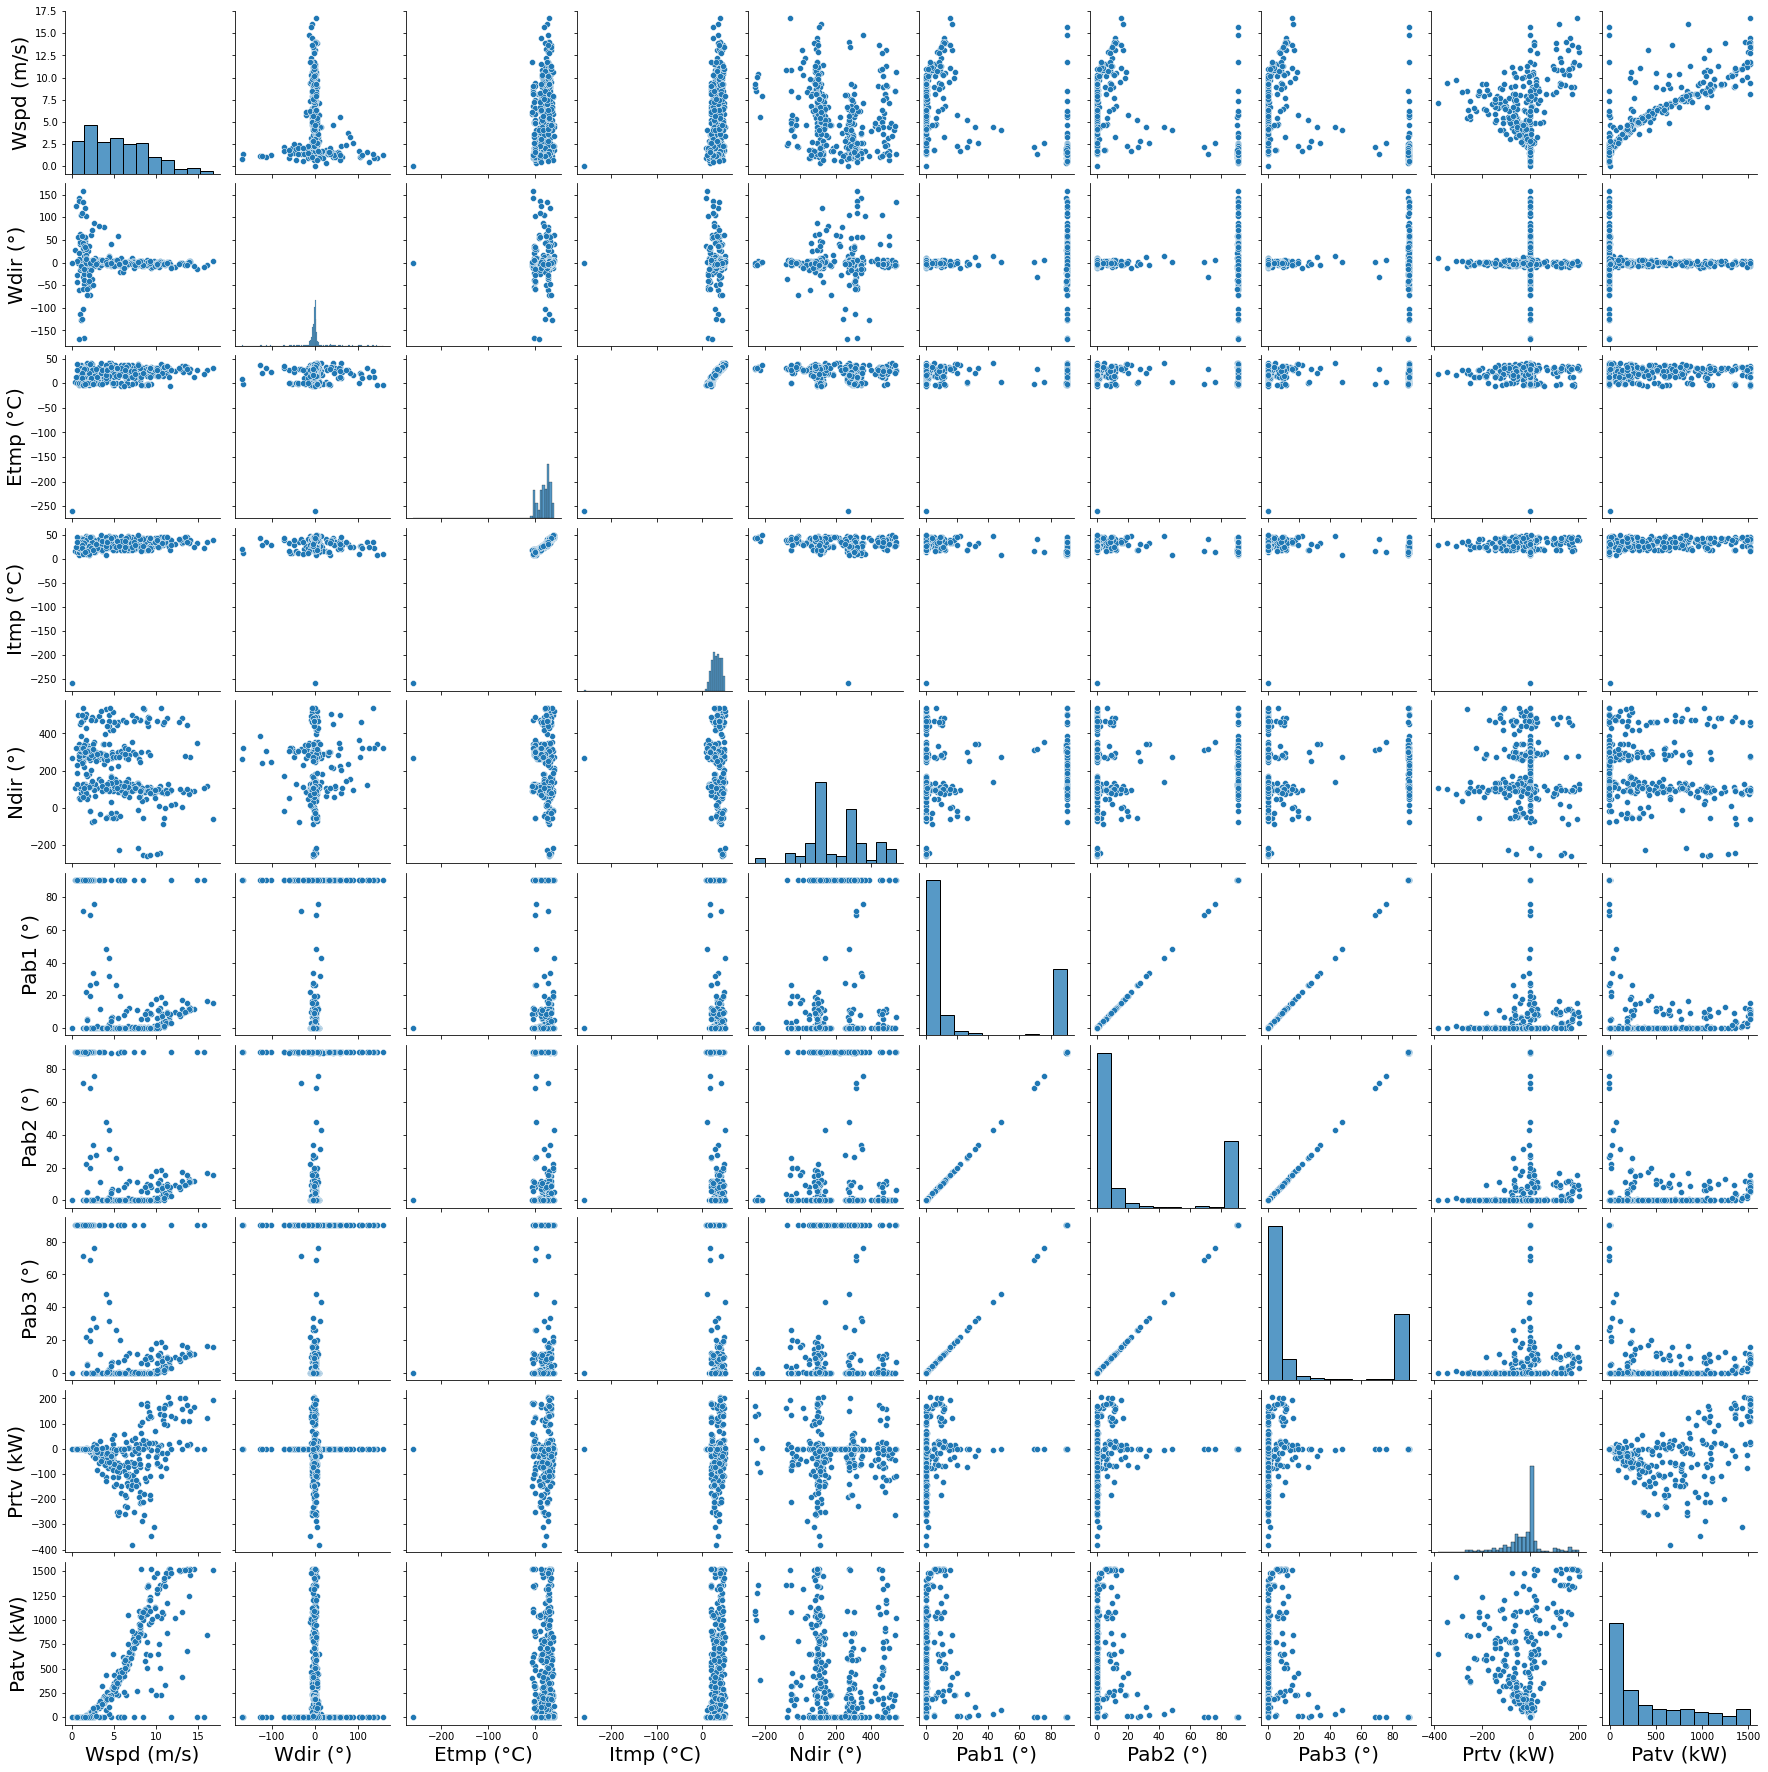

In [15]:
# Identify a turbine and fraction of data to plot (you can changes these values!)
turb_id = 6     # the id of the turbine
fraction = 0.01 # the fraction of the rows to include in the plot

utils.plot_pairplot(top_turbines, turb_id, numerical_features, fraction)

### 6.5 Correlation matrix


You can use a correlation matrix to see how different variables correlate with each other. The [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) you'll calculate below is measured between -1 and 1. Numbers closer to 1 or -1 indicate higher levels of correlation between two variables, while values close to 0 indicate no significant correlation between two variables. You can ignore the 1's along the diagonal as those just represent the correlation of each variable with itself. Do you notice any significant correlations? How do these values compare to what you found in the scatterplots?

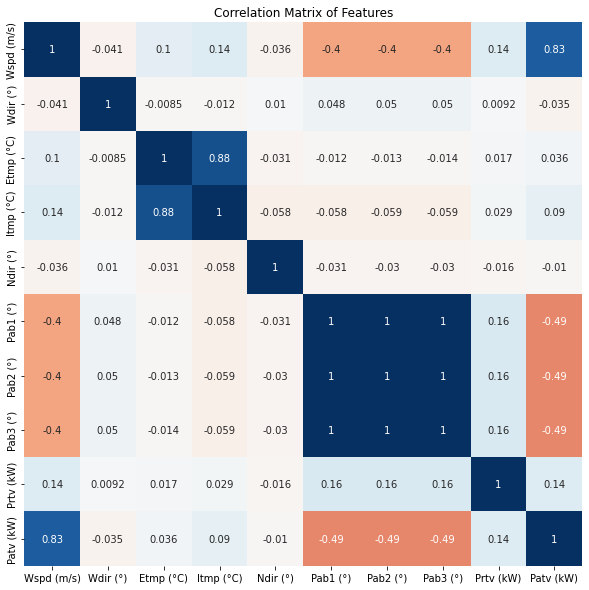

In [16]:
# Generate a corrlation matrix
utils.correlation_matrix(top_turbines[numerical_features])

### 6.6  Time Series 

#### Format date and time


Right now the data has the day and the time encoded as separate features. To plot a time series of the data it makes more sense to have a single feature with the combined "datetime" information of each record. You can do this by running the next cell. 

**If you at the [SDWPF paper](https://arxiv.org/abs/2208.04360) it is stated that day 1 corresponds to May 1st 2020, so in this conversion you'll convert day number to a proper date.**.

In [18]:
# Create proper datetimes (this takes around 15 secs)
raw_data = utils.format_datetime(top_turbines, initial_date_str="01 05 2020")

raw_data.head(5)

,TurbID,Wspd (m/s),Wdir (°),Etmp (°C),Itmp (°C),Ndir (°),Pab1 (°),Pab2 (°),Pab3 (°),Prtv (kW),Patv (kW),Datetime
1,1,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,2020-05-01 00:10:00
2,1,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,2020-05-01 00:20:00
3,1,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,2020-05-01 00:30:00
4,1,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,2020-05-01 00:40:00
5,1,6.10,-1.03,30.47,41.22,20.91,1.0,1.0,1.0,-0.27,482.21,2020-05-01 00:50:00


#### Plot time series

Run the cell below to generate a plot of features over the time span of the data for a particular turbine. You can use the pulldown menus to choose different turbines and features. You can also use the sliders to zoom in or out on a particular range of dates. 

You might already have noticed from previous plots that both `Etmp (°C)` and `Itmp (°C)` have really negative values which are most likely caused by errors on the sensors. These values make it hard to visualize the actual time series for these features so there is a toggle `fix temperatures` below that you can turn on to replace these by the values produced by using a linear interpolation.

In [19]:
# Generate a time series plot of features for a paricular turbine
utils.plot_time_series(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Turbine ID', index=9, options=(1, 3, 4, 5, 6, 9, 10, 11, 12, 70), …

####  Time Series for a pair of turbines

You can also take a look at the time series for any pair of turbines. This is helpful to identify weird behaviours for a particular turbine or to check erratic behaviour in features that should behave very similar since they are not turbine-specific such as the external temperature.

In [20]:
# Generate a time series plot of features for a pair of turbines
utils.time_series_turbine_pair(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Turbine ID', index=8, options=(1, 3, 4, 5, 6, 9, 10, 11, 12, 70), …

## **Congratulations on finishing this lab!**

**Keep up the good work :)**